# Application of Deep Learning for Natural Langage Processing (NLP) 1 : A first example
## Practical work - ENIB - Artificial Intelligence and Simulation module 
**Pierre De Loor**


During this practical work, you will learn how ML can be use to process Natural Langage. We considere that the starting material are sentences syntaxically encoded (ASCII or other encoding) but not vocal signal which is another step for a full NLP system). 
The material I used to produce this notebook is mainly :
1. Hands on natural langage processing with python: A practical guide to applying deep learning architectures to your NLP applications (Rajesh Arumugam and Rajalingappaa Shanmugamani)
2. 
3. Deep learning with python (François Chollet)

From these sentences, different tasks can be done :


1.   Sentiment analysis : allows the classification of a text among different classes
2.   Translation from one langage to another
3.   Completion of sentences or texts
4.   Generation of answers

Even if there are a lot of technics to adress these tasks - statistics,linguistics knowledges, grammatical rules, logical inferences ([follow this link for more details](https://https://en.wikipedia.org/wiki/History_of_natural_language_processing))) - we will study the case of machine learning applications. As for artificial vision, the hope of the use of Deep Learning for NLP is to avoid the search of explicit knowledges about linguistics and grammar and to let the algorithm found them in the form of numerical values that define Deep Learning models. 



First, you must verify that keras is well accessible on your system:

In [ ]:
import keras
keras.__version__

'2.4.3'

Then we will study a first database that consist of binary labelled text

# IMDB data
IMDB dataset is a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary (integer encoding).

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded):

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step




The argument `num_words=10000 ` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":


In [ ]:
print(train_data[0])
print("lenght : ", len(train_data[0]))


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
lenght :  218


In [ ]:
train_labels[0]

1

For kicks, here's how you can quickly decode one of these reviews back to English words:

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
print(train_labels[0])
print(decoded_review)

1
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

# Question 1.1
* What is the review of the 4th film ? What is it's class ? (`positive` or `negative` ?) 

* If you planed to learn these classes, which inputs did you use for a machine learning algorithm ? 

* What difficulties do you think you will encounter ?

In [ ]:
#1.1 -1
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[3]])
print('4th film review :' + decoded_review)
print('review was : ' + str(train_labels[3]))
# 0 stands for "negative" and 1 stands for "positive" so in that case it's positive review


4th film review :? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather bef

# A first neural network to learn text classification


1.1 - 2 :
We use for inputs index of words in the review and label . (train_data &train_labels)

1.1 - 3 : 
The input shape of neural network will not be the same for each film. 

# Encoding the data

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

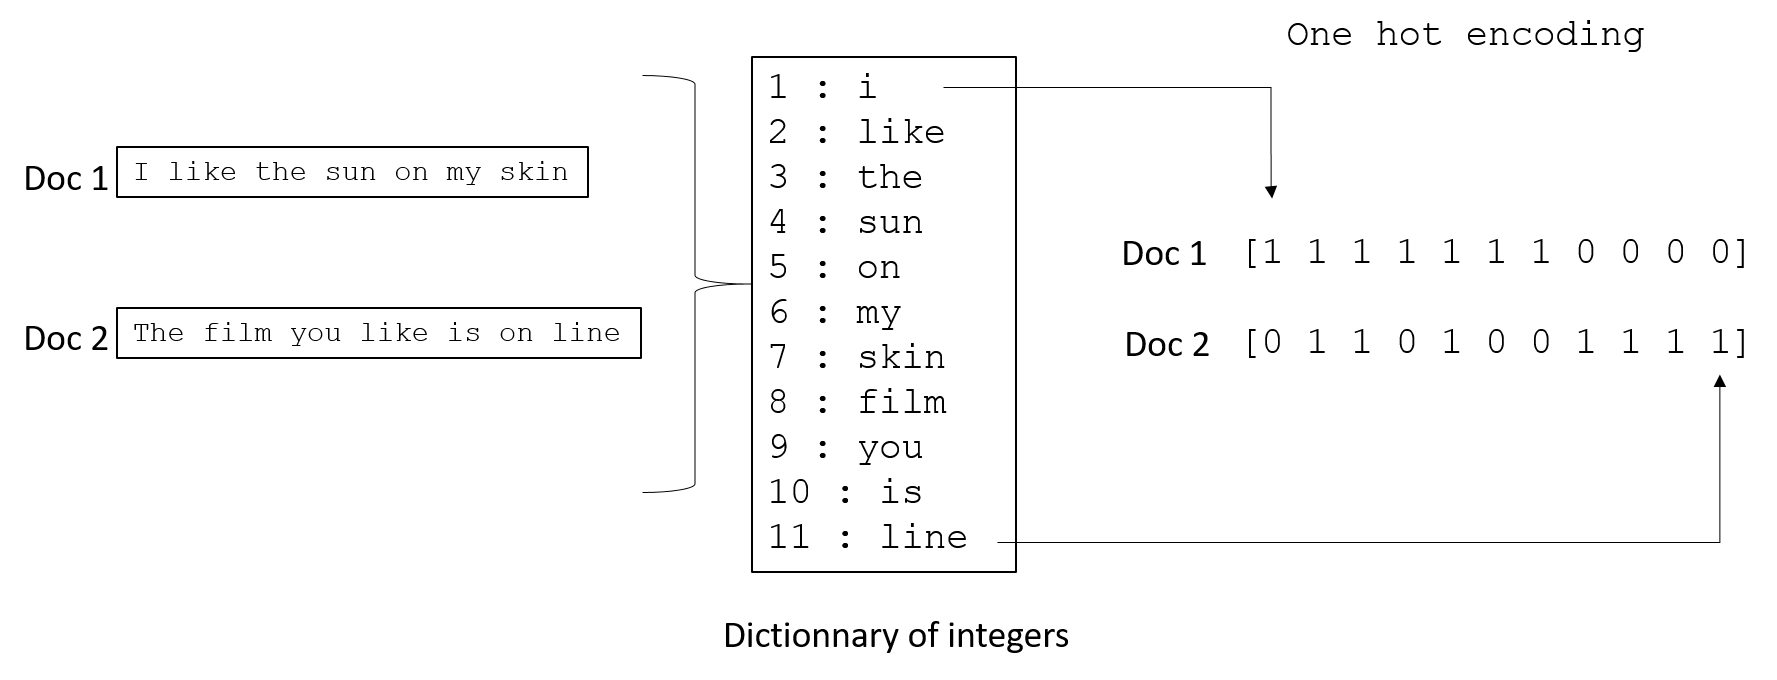

Question : 

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Now, one sequence is such a vector :

In [ ]:
print(x_train[0])
print(x_train[0][0])
print(x_train[0][1])
print(x_train[0][16])
print(x_train[0][1622])
print(x_train[0].size)
print(x_train[1].size)

print(x_train.size)



[0. 1. 1. ... 0. 0. 0.]
0.0
1.0
1.0
1.0
10000
10000
250000000


**Question**

Can you explain the values that are returned by the algorithm.


The algorithm receive the list of lists of indexed worlds and return this list with a one hot encoding. 

To vectorize the labels we just have to write :

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building the network

Our input data is simply vectors, and our labels are scalars (1s and 0s). A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with `relu` activations (for instance: `Dense(16, 
activation='relu')` for 16 hidden units), a binary cross entropy loss function (see [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/) for its definition) and an RMSprop optimizer (see its specificity  [here](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a))






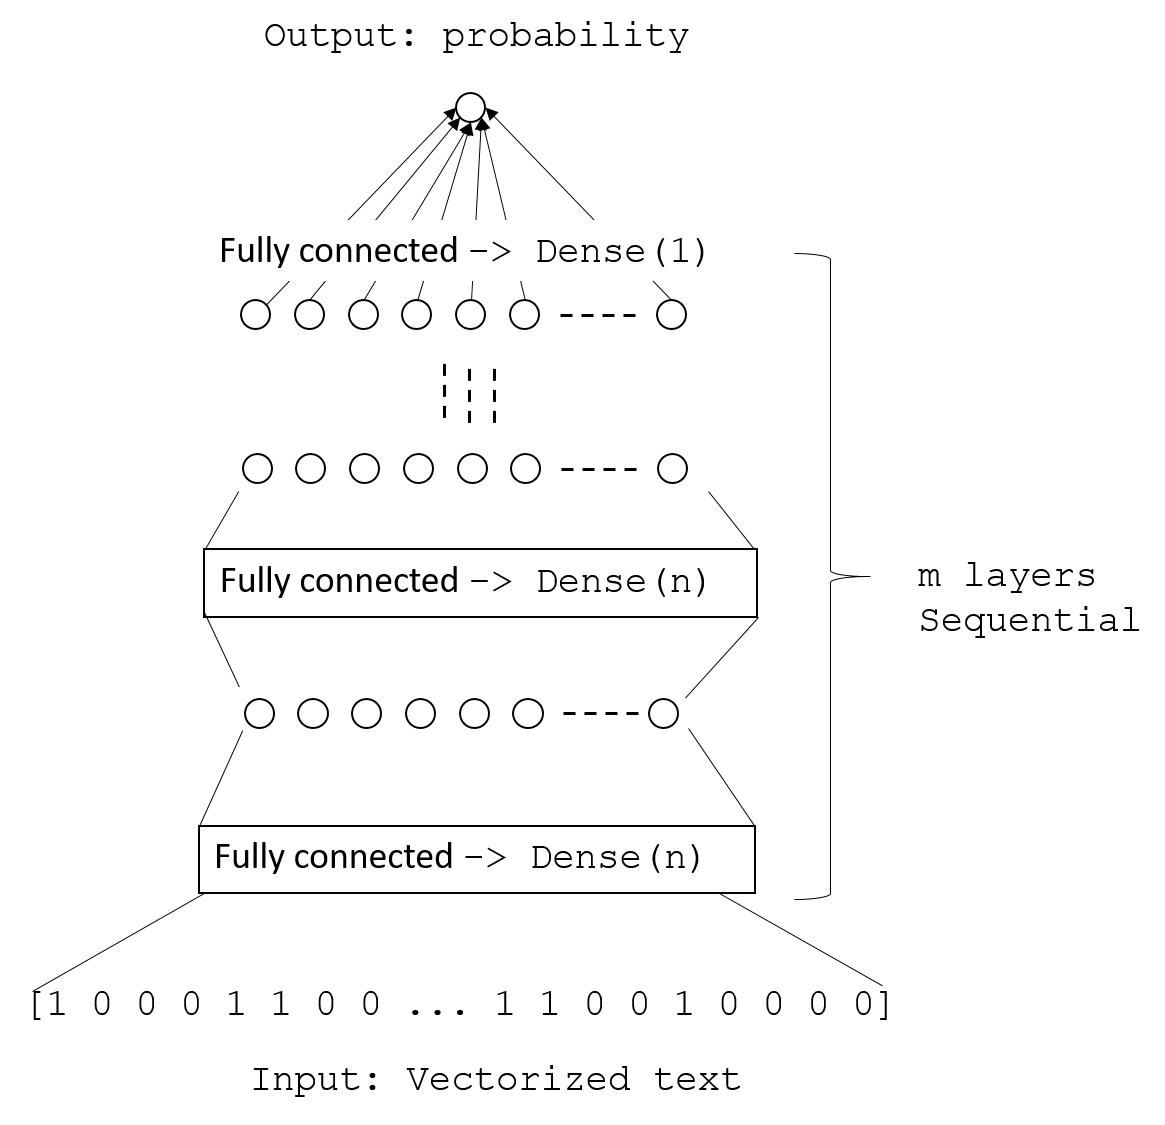

For the moment, we will start with the following architecture choice: two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review. The intermediate layers will use relu as their "activation function", and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid "squashes" arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
#print(len(partial_x_train))

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 samples. 
A **mini-batch** is a sub-set of the training data. The model is uptaded after each mini-batch. After one iteration (also named **epochs**), all the training data are processed by the algorithm. The choice of using mini-batch or not is out of this course but is a parameter that can influence the performance of the gradient descent during learning.
We will also monitor `loss` and `accuracy` on the 10,000 samples that we set apart. This is done by passing the validation data as the `validation_data` argument:



In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1710 - accuracy: 0.9530 - val_loss: 0.2844 - val_accuracy: 0.8880
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1330 - accuracy: 0.9607 - val_loss: 0.2915 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1053 - accuracy: 0.9701 - val_loss: 0.3005 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0876 - accuracy: 0.9755 - val_loss: 0.3265 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0723 - accuracy: 0.9827 - val_loss: 0.3452 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0593 - accuracy: 0.9843 - val_loss: 0.3769 - val_accuracy: 0.8776
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0484 - accuracy: 0.9883 - val_loss: 0.3993 - val_accuracy: 0.8744
Epoch 8/20
30

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:


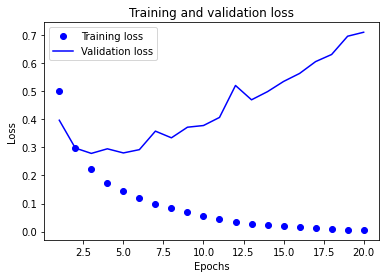

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

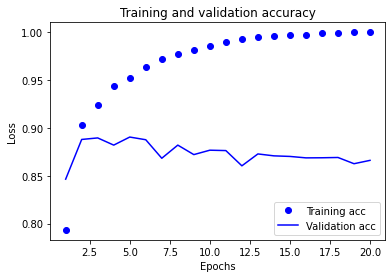

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Question 1.2
* What is best loss/accuracy finded by the algorithm ?

The best is at epoch 5/20


* Can you explain these curves ?


We see that for trainning accuracy will increase and loose will decrease because the neural network is trainning on this data 

With the validation data accuracy will increase until epoch 5. Then we are in overfitting case so the accuracy will decrease. 

* What is the name of the observed phenomena ?

It's called over fitting 

* What do you propose to improve them ?

We should reduce the epoch to 5 because then it's overfitting 

We could use larger trainning data and we could also remove neutral worlds like horse tree ... 
We could also remove worlds that occured not realy often ( this mean change the num_words value when loading the dataset. 


The predictions done for each test data is obtain with:

In [ ]:
modelResult = model.predict(x_test)

One of the goal is to optimize this accuracy (for this example some proposition lead to an accuracy of 95%). For that, the model could be changed (number of layers, number of cells) but often, a preprocessing of the data is a better choice. For instance, **in the previous example, the sequences of the words in the documents are not encoded. The number of occurences of each word in the documents are not encoded too... It could be relevant to identifying certain patterns that could have a "signification".**

#Question 1.3 : 
* For the 10 first data, print the value of the labels of the data (found in the database) and a the value computed by the model.

* Among this 10 cases, identify one data with a value that seems clearly not valuated by the algortihm

* Print the content of these data and try to explain what can be the problem ? 

In [ ]:
for i in range(10) : 
  print(y_test[i],'--->',modelResult[i])
  if(y_test[i] != round(float(modelResult[i]))) : 
    print('Problem :')
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[i]])
    print(decoded_review)
    print(' ')






0.0 ---> [0.00278524]
1.0 ---> [1.]
1.0 ---> [0.9861657]
0.0 ---> [0.97290945]
Problem :
? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we ha

1.3 : the problem is that people explain what they like in a movie but conclude by why they doesn't like it. 

# Question 1.4

* Try to use 1 or 3 hidden layers

* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...

* For the fourth combination of number of layers and number of units, give the best accuracy obtained. 




#END of PART 1